<a href="https://colab.research.google.com/github/tonu1990/AI_ML_Learning/blob/main/Keras_Sequential_vs_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Neural networks play an important role in machine learning. Inspired by how human brains work, these computational systems learn a relationship between complex and often non-linear inputs and outputs

* A basic neural network consists of an input layer, a hidden layer and an output layer.
* Each layer is made of a certain number of nodes or neurons.
* Neural networks with many layers are referred to as **deep learning systems**.
* **Neural networks are very complex in architecture and computationally expensive.**

* Luckily we have Keras, a **deep learning AP**I written in Python running on top of Tensorflow, that makes our work of building complex neural networks much easier.

* Keras provides a high-level interface that abstracts many of the complex details of TensorFlow. Instead of dealing with low-level tensor operations and session management, you use Keras’s classes and functions to build and train neural networks.

* Keras offers two ways to build neural networks.
  * using **Sequential API** : we create the model layer-by-layer. It is very simple and easy to use. But sharing of layers or branching of layers is not allowed

  * using **Functional API** : It is more flexible than the sequential API. It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. And also it can have multiple inputs and outputs.



Consider the below Neural Network architecture .

We can create build the neural network using both the APIs. The code for both networks are given later.

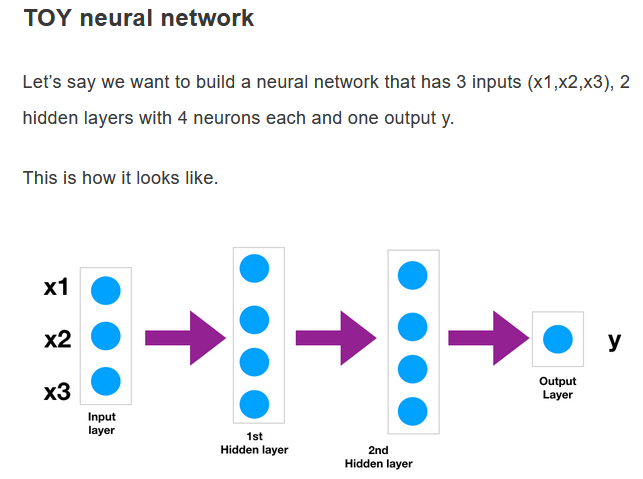

**Network using Sequential API**

In [1]:
# code using Sequential API

##Import the libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

## Creating the model

model = Sequential()

model.add(Dense(4,activation='relu')) ##<----- You don't have to specify input size.Just define the hidden layers
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

## defining the optimiser and loss function
model.compile(optimizer='adam',loss='mse')



In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Note : You don’t have to specify a separate input layer in the sequential API. It automatically recognizes the input shape.
* A sample call will be as follows ;


In [ ]:
## training the model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

**Network using Functional API**


* Here you define an input layer and specify the input size= Input(shape=)
* You define a layer by giving it a name, specifying the number of neurons, activation function, etc.
* Then put the previous layer in a set of parentheses.


In [1]:
##Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

## Creating the layers
input_layer = Input(shape=(3,))
Layer_1 = Dense(4, activation="relu")(input_layer)
Layer_2 = Dense(4, activation="relu")(Layer_1)
output_layer= Dense(1, activation="linear")(Layer_2)
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)
## defining the optimiser and loss function
model.compile(optimizer='adam',loss='mse')

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## training the model
model.fit(X_train, y_train,epochs=400, batch_size=128,validation_data=(X_test,y_test)

**Sharing/Branching of Layers in Functional API**

* Because you can define any layer separately and independently the functional API enables us for branching and multiple inputs and outputs.
* What it means is you can branch out and add one (or any number of) different layers from any layer.


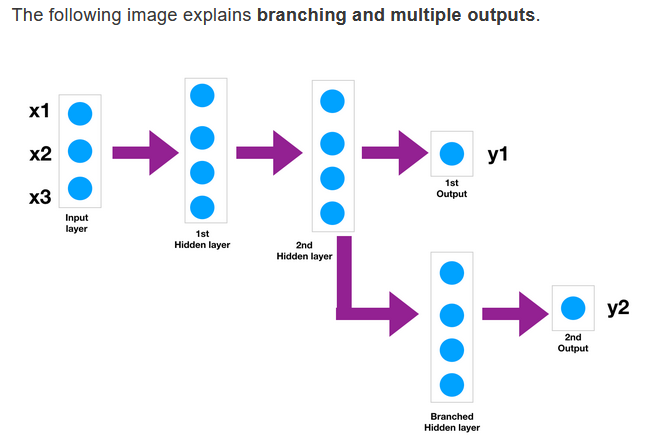

* As it is evident one more layer is added after the 2nd hidden layer.
* The output of the 2nd hidden layer is used to predict ‘y1’ and at the same time is fed to one more layer(Branched hidden layer)which predicts a 2nd output ‘y2’.

* We would have built 2 different neural networks to predict outputs y1 and y2 using sequential API  but the **functional API enabled us to predict two outputs in a single network**.



In [4]:
##Import the libraries for neural networks

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Dense

#### Building the neural network

##### Here we are using 2 hidden layers and one branched layer with 10 neurons each

##define input layer

input_layer = Input(shape=(3,),name='input_layer')

##Defining 2 hidden layers

Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)

Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)

##Defining  output layer y1

y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)

##Defining Branched layer

Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)

##Defining 2nd output layer y2

y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)

##Defining the model by specifying the input and output layers

model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

##summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Layer_1 (Dense)           │ (None, 10)             │             40 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Layer_2 (Dense)           │ (None, 10)             │            110 │ Layer_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Branched_layer (Dense)    │ (None, 10)             │            110 │ Layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y1_output (Dense)         │ (None, 1)              │             11 │ Layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y2_output (Dense)         │ (None, 1)              │             11 │ Branched_layer[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

**Example problem**

Let’s apply the functional API to real-world data. We are going to use the combined cycle power plant data set from the UCI machine learning repository. Download the dataset from the below link.

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

**Dataset information**(Taken from above link):

* The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load.
* A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

* Attribute Information(Taken from above link):Features consist of hourly average ambient variables
  * Temperature (T) in the range 1.81°C and 37.11°C.
 * Ambient Pressure (AP) in the range 992.89-1033.30 millibar.

 * Relative Humidity (RH) in the range 25.56% to 100.16%.
 * Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.
 * Net hourly electrical energy output (PE) 420.26-495.76 MW.

* Let’s build a neural network using functional API to **predict Net hourly electrical energy output (PE)** and **Exhaust Vacuum (V)** with Temperature (T), Ambient Pressure (AP) and Relative Humidity (RH) as inputs.

In [1]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
##import the dataset

df = pd.read_excel('Folds5x2_pp.xlsx')

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
##define a function to get the outputs of the model

def get_outputs(data):

  y1 = data.pop('PE')
  y1 = np.array(y1)
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1, y2

In [4]:
# Split the data into train and test with 80 train / 20 test

train, test = train_test_split(df, test_size=0.2, random_state = 1)

In [5]:
##getting the outputs(PE) and (V) of the train and test data

y_train = get_outputs(train)

y_test = get_outputs(test)

###Scaling the inputs

min_max=MinMaxScaler()

X_train=min_max.fit_transform(train)

X_test=min_max.transform(test)


In [6]:
##Import the libraries for neural networks

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Dense

**Building the neural network**

(Here we are using 2 hidden layers and one branched layer with 10 neurons each)

In [7]:
##define input layer

input_layer = Input(shape=(3,),name='input_layer')

##Defining 2 hidden layers

Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)

Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)

##Defining  output layer y1

y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)

##Defining Branched layer

Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)

##Defining 2nd output layer y2

y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)

##Defining the model by specifying the input and output layers

model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

##summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Layer_1 (Dense)           │ (None, 10)             │             40 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Layer_2 (Dense)           │ (None, 10)             │            110 │ Layer_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Branched_layer (Dense)    │ (None, 10)             │            110 │ Layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y1_output (Dense)         │ (None, 1)              │             11 │ Layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ y2_output (Dense)         │ (None, 1)              │             11 │ Branched_layer[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## defining the optimiser and loss function

model.compile(optimizer='adam',

              loss={'y1_output':'mse','y2_output':'mse'})

##training the model

model.fit(X_train,y_train,epochs=1000, batch_size=128, validation_data=(X_test,y_test))

Now let’s predict energy output and exhaust vacuum on the test data and check the performance

In [9]:
##model predictions

predictions = model.predict(X_test)

predicted_energy=predictions[0]

predicted_vacuum=predictions[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Text(0, 0.5, 'predicted energy output')

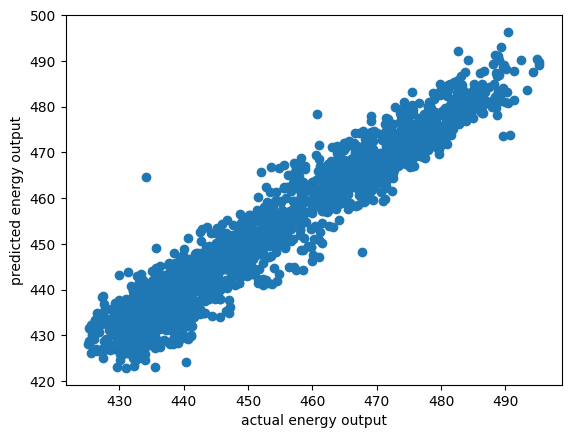

In [10]:
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

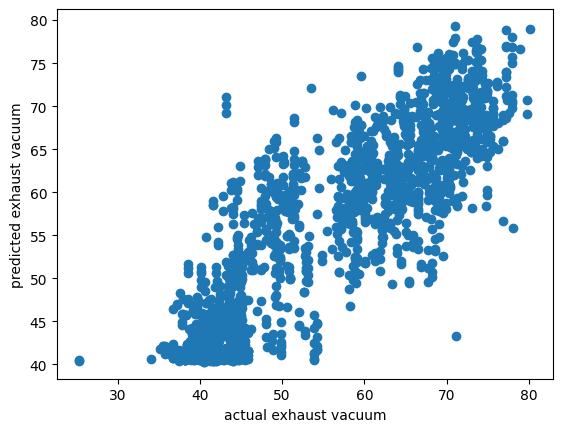

In [11]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vacuum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

Looks like our model is doing better in predicting the energy output than predicting the exhaust vacuum.

In [13]:
from sklearn.metrics import r2_score
print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))

print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vacuum))

r2 score for energy predicted : 0.9247752512507145
r2 score forexhaust vacuum predicted : 0.781748665708985


The predictions can be further improved by tuning various hyperparameters.
Conclusion:
* The functional API offers more flexibility and control over the layers than the sequential API.
* It can be used to predict multiple outputs(i.e output layers) with multiple inputs(i.e input layers))


### **Another sample scenario - Car Price Prediction**

In real-world scenarios, especially in tasks like used car price prediction, we often deal with multiple types of data (tabular, image, and text). To handle such diverse data, we need to design a comprehensive model that combines different types of neural networks, such as ANNs (for tabular data), CNNs (for image data), and RNNs (for text data). The Functional API in TensorFlow/Keras is particularly useful for this purpose because it allows us to create complex models with multiple inputs and outputs.
Problem Description

We want to predict the price of a used car based on:
* Tabular Data:

  * Brand (categorical)

  * Year of manufacturing (numerical)

  * Kilometers driven (numerical)

* Image Data:         Images of the car (to assess its condition)

* Text Data:        Description provided by the user (e.g., maintenance, ownership history, reason for sale)

**Model Design**

To handle this, we will design a multi-input model:

* ANN for Tabular Data:Process numerical and categorical features.

* CNN for Image Data: Extract features from car images.

* RNN for Text Data: Process textual descriptions.

**Combine All Features**:  Concatenate the outputs of the three models and pass them through a final dense layer for price prediction.

A pseudo code might look like this

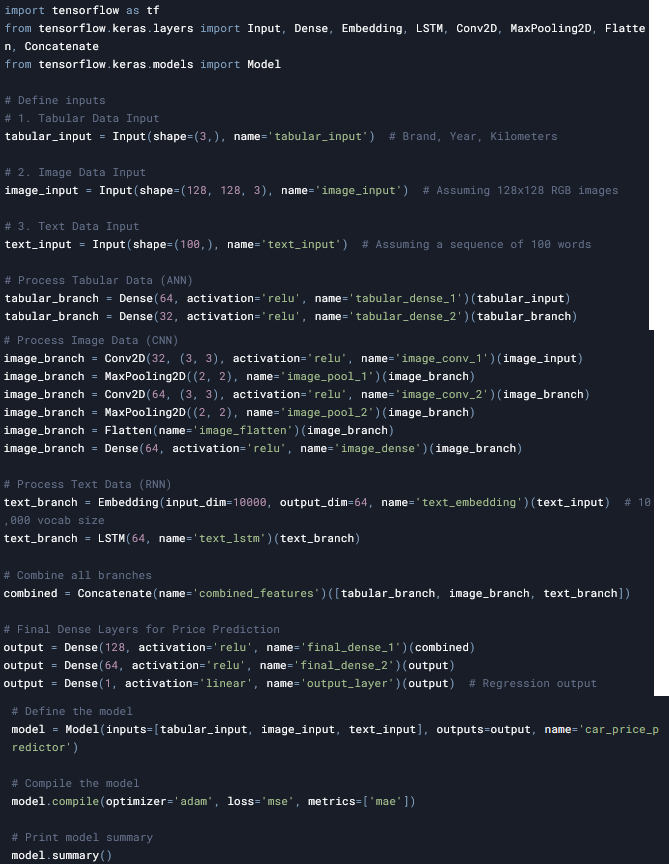

### **Popular Computer Vision Architectures Best Implemented Using the Functional API**

The Functional API in TensorFlow/Keras is a powerful tool for building complex, non-linear, and multi-input/multi-output neural network architectures. It is particularly well-suited for implementing many popular computer vision architectures due to its flexibility in defining branches, skip connections, and shared layers. Below is a note on some of the most popular computer vision architectures that are best implemented using the Functional API.

**Inception Networks** (e.g., InceptionV3, Inception-ResNet)

* Key Feature: Uses parallel branches with different filter sizes (1x1, 3x3, 5x5) for multi-scale feature extraction.

* Why Functional API?: The parallel branches and concatenation operations are naturally supported by the Functional API.

* Example Use Case: Image classification, object detection.

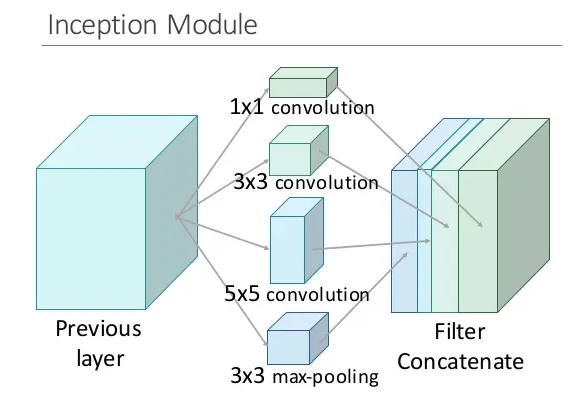

**Residual Networks** (ResNet, ResNeXt)

* Key Feature: Uses skip connections to enable training of very deep networks.

* Why Functional API?: Skip connections (using Add) and branching are easily implemented with the Functional API.

* Example Use Case: Image classification, object detection.

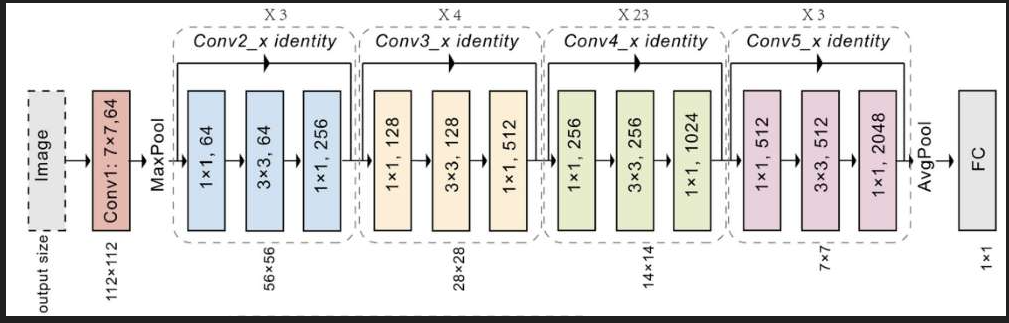

**DenseNet**

* Key Feature: Each layer is connected to every other layer in a feed-forward fashion, promoting feature reuse.

* Why Functional API?: The dense connections between layers are easily implemented using the Functional API.

* Example Use Case: Image classification, object detection.

**U-Net**
* Key Feature: Used for image segmentation, with an encoder-decoder architecture and skip connections.

* Why Functional API?: The skip connections between encoder and decoder are easily implemented using the Functional API.

* Example Use Case: Medical image segmentation, satellite image analysis.

**Vision Transformers** (ViT)

* Key Feature: Uses self-attention mechanisms for image classification, inspired by transformers in NLP.

* Why Functional API?: The multi-head attention and patch embedding layers are easier to implement with the Functional API.

* Example Use Case: Image classification.